In [29]:
%matplotlib inline
from __future__ import division
from collections import Counter
import random
from lin_alg import *
from stats import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')

In [19]:
def raw_majority_vote(labels):
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner

def majority_vote(labels):
    """assumes labels sorted by distance ASC"""
    vote_counts = Counter(labels)
    
    winner, winner_count = vote_counts.most_common(1)[0]
    
    num_winners = len([count
                      for count in vote_counts.values()
                      if count == winner_count])
    
    if num_winners == 1:
        return winner
    else:
        return majority_vote(labels[:-1]) # remove the furthest label and repeat
    
# now easy to build knn
def knn_classify(k, labeled_points, new_point):
    """labeled points are (point, label)"""
    
    # sort by distance ASC
    by_distance = sorted(labeled_points,
                        key = lambda (point, _): distance(point, new_point))
    
    # make the nearest neighbor label list
    k_nearest_lables = [label for _,label in by_distance[:k]]
    
    # vote
    return majority_vote(k_nearest_lables)

In [15]:
# Sample data
cities = [(-86.75,33.5666666666667,'Python'),(-88.25,30.6833333333333,'Python'),(-112.016666666667,33.4333333333333,'Java'),(-110.933333333333,32.1166666666667,'Java'),(-92.2333333333333,34.7333333333333,'R'),(-121.95,37.7,'R'),(-118.15,33.8166666666667,'Python'),(-118.233333333333,34.05,'Java'),(-122.316666666667,37.8166666666667,'R'),(-117.6,34.05,'Python'),(-116.533333333333,33.8166666666667,'Python'),(-121.5,38.5166666666667,'R'),(-117.166666666667,32.7333333333333,'R'),(-122.383333333333,37.6166666666667,'R'),(-121.933333333333,37.3666666666667,'R'),(-122.016666666667,36.9833333333333,'Python'),(-104.716666666667,38.8166666666667,'Python'),(-104.866666666667,39.75,'Python'),(-72.65,41.7333333333333,'R'),(-75.6,39.6666666666667,'Python'),(-77.0333333333333,38.85,'Python'),(-80.2666666666667,25.8,'Java'),(-81.3833333333333,28.55,'Java'),(-82.5333333333333,27.9666666666667,'Java'),(-84.4333333333333,33.65,'Python'),(-116.216666666667,43.5666666666667,'Python'),(-87.75,41.7833333333333,'Java'),(-86.2833333333333,39.7333333333333,'Java'),(-93.65,41.5333333333333,'Java'),(-97.4166666666667,37.65,'Java'),(-85.7333333333333,38.1833333333333,'Python'),(-90.25,29.9833333333333,'Java'),(-70.3166666666667,43.65,'R'),(-76.6666666666667,39.1833333333333,'R'),(-71.0333333333333,42.3666666666667,'R'),(-72.5333333333333,42.2,'R'),(-83.0166666666667,42.4166666666667,'Python'),(-84.6,42.7833333333333,'Python'),(-93.2166666666667,44.8833333333333,'Python'),(-90.0833333333333,32.3166666666667,'Java'),(-94.5833333333333,39.1166666666667,'Java'),(-90.3833333333333,38.75,'Python'),(-108.533333333333,45.8,'Python'),(-95.9,41.3,'Python'),(-115.166666666667,36.0833333333333,'Java'),(-71.4333333333333,42.9333333333333,'R'),(-74.1666666666667,40.7,'R'),(-106.616666666667,35.05,'Python'),(-78.7333333333333,42.9333333333333,'R'),(-73.9666666666667,40.7833333333333,'R'),(-80.9333333333333,35.2166666666667,'Python'),(-78.7833333333333,35.8666666666667,'Python'),(-100.75,46.7666666666667,'Java'),(-84.5166666666667,39.15,'Java'),(-81.85,41.4,'Java'),(-82.8833333333333,40,'Java'),(-97.6,35.4,'Python'),(-122.666666666667,45.5333333333333,'Python'),(-75.25,39.8833333333333,'Python'),(-80.2166666666667,40.5,'Python'),(-71.4333333333333,41.7333333333333,'R'),(-81.1166666666667,33.95,'R'),(-96.7333333333333,43.5666666666667,'Python'),(-90,35.05,'R'),(-86.6833333333333,36.1166666666667,'R'),(-97.7,30.3,'Python'),(-96.85,32.85,'Java'),(-95.35,29.9666666666667,'Java'),(-98.4666666666667,29.5333333333333,'Java'),(-111.966666666667,40.7666666666667,'Python'),(-73.15,44.4666666666667,'R'),(-77.3333333333333,37.5,'Python'),(-122.3,47.5333333333333,'Python'),(-89.3333333333333,43.1333333333333,'R'),(-104.816666666667,41.15,'Java')]
cities = [([longitude, latitude], language) for longitude, latitude, language in cities]

In [22]:
# Does lat long predict lang usage?

for k in [1, 3, 5, 7]:
    num_correct = 0
    
    for city in cities:
        location, actual_language = city
        other_cities = [other_city
                       for other_city in cities
                       if other_city != city]
        
        predicted_language = knn_classify(k, other_cities, location)
        
        if predicted_language == actual_language:
            num_correct += 1
            
    print k, "neighbor[s]:",  num_correct, "correct out of", len(cities)

1 neighbor[s]: 40 correct out of 75
3 neighbor[s]: 44 correct out of 75
5 neighbor[s]: 41 correct out of 75
7 neighbor[s]: 35 correct out of 75


### Curse of Dimensionality

In [23]:
# in high dimensions even close points can be super far away

In [25]:
def random_point(dim):
    return [random.random() for _ in range(dim)]

def random_distances(dim, num_pairs):
    return [distance(random_point(dim), random_point(dim))
           for _ in range(num_pairs)]

In [28]:
dimensions = range(1,101)

avg_distances = []
min_distances = []

random.seed(0)

for dim in dimensions:
    distances = random_distances(dim, 10000)
    
    avg_distances.append(mean(distances))
    min_distances.append(min(distances))

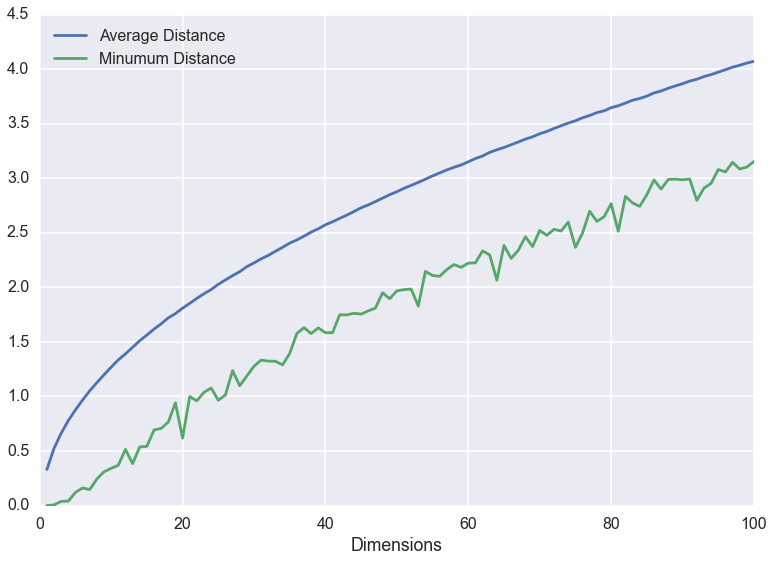

In [34]:
plt.plot(dimensions, avg_distances, label = 'Average Distance')
plt.plot(dimensions, min_distances, label = 'Minumum Distance')
plt.xlabel('Dimensions')
plt.legend(loc = 'best')

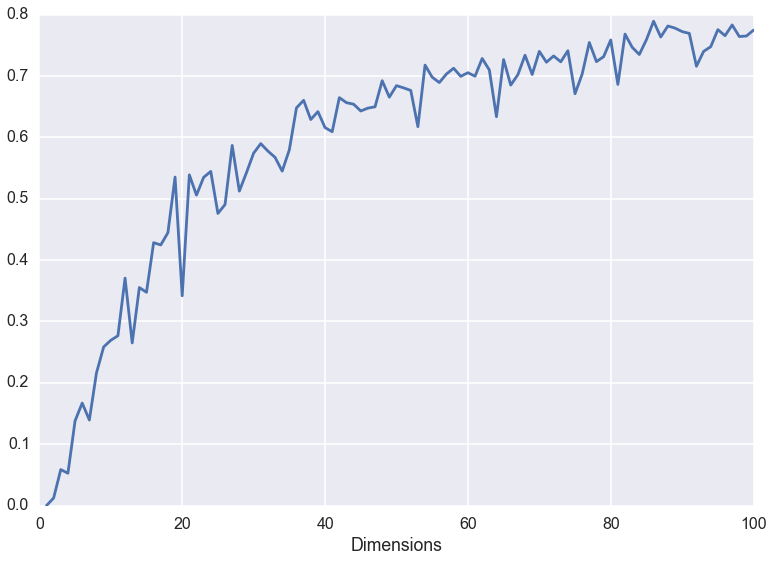

In [36]:
plt.plot(dimensions, [md / ad for md, ad in zip(min_distances, avg_distances)])
plt.xlabel('Dimensions')